In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

! cp /content/drive/MyDrive/kaggle.json ~/
! mkdir ~/.kaggle
! mv ~/kaggle.json ~/.kaggle/kaggle.json
! chmod 600 ~/.kaggle/kaggle.json

Mounted at /content/drive


In [ ]:
! kaggle datasets download -d eldarsultanow/ml-bsd-dataset

100% 1.50G/1.51G [00:07<00:00, 241MB/s]
100% 1.51G/1.51G [00:07<00:00, 205MB/s]


In [ ]:
! unzip ml-bsd-dataset.zip

Archive:  ml-bsd-dataset.zip
  inflating: rank-vs-ap.csv          


In [ ]:
!pip install -q -U git+https://github.com/mljar/mljar-supervised.git@master

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 12.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.5/90.5 KB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 23.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import lightgbm as lgb
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv("rank-vs-ap.csv")


In [ ]:
X = data.filter(regex=("ap_\d+"))


In [ ]:
y = data["rank"]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)


In [ ]:
params = {
    "objective": "regression",
    "metric": "rmse",
    "boosting_type": "gbdt",
    "num_leaves": 32,
    "learning_rate": 0.1,
    "max_depth": -1,
    "min_child_samples": 20,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "n_estimators": 1000,
    "verbose": -1
}

In [ ]:
model = lgb.train(params, train_data, valid_sets=[train_data, test_data], early_stopping_rounds=100, verbose_eval=100)

/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.9/dist-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


Training until validation scores don't improve for 100 rounds
[100]	training's rmse: 0.734954	valid_1's rmse: 0.767787
[200]	training's rmse: 0.667946	valid_1's rmse: 0.736468
[300]	training's rmse: 0.618287	valid_1's rmse: 0.720059
[400]	training's rmse: 0.577086	valid_1's rmse: 0.709268
[500]	training's rmse: 0.541303	valid_1's rmse: 0.701252
[600]	training's rmse: 0.509596	valid_1's rmse: 0.695144
[700]	training's rmse: 0.481447	valid_1's rmse: 0.690347
[800]	training's rmse: 0.455911	valid_1's rmse: 0.686894
[900]	training's rmse: 0.433218	valid_1's rmse: 0.684356
[1000]	training's rmse: 0.412634	valid_1's rmse: 0.682487
Did not meet early stopping. Best iteration is:
[1000]	training's rmse: 0.412634	valid_1's rmse: 0.682487


In [ ]:
y_pred = model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print("RMSE: {:.3f}".format(rmse))
print("R^2 Score: {:.3f}".format(r2))

RMSE: 0.682
R^2 Score: 0.490


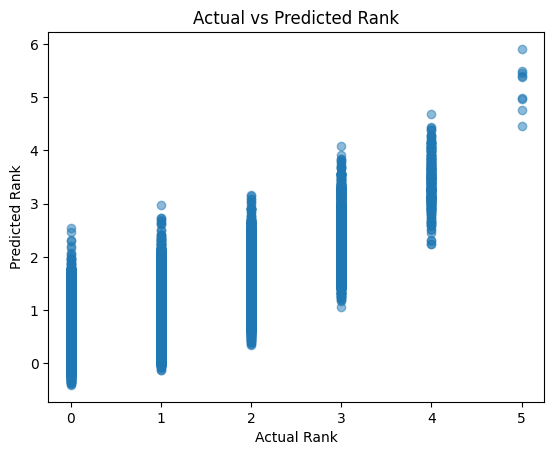

In [ ]:
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")
plt.title("Actual vs Predicted Rank")
plt.show()